In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
%cd Downloads

C:\Users\Acer\Downloads


In [ ]:
# world = credits

In [ ]:
world = pd.read_csv("world_happiness.csv")

In [ ]:
##world.drop("" )

In [ ]:
world_df_merge=world

In [ ]:
world_df_merge.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
world_cleaned_df=world_df_merge

In [ ]:
v=world_cleaned_df['Healthy life expectancy']
R=world_cleaned_df['Social support']
Z=world_cleaned_df['Perceptions of corruption']
t=world_cleaned_df['Logged GDP per capita']
C=world_cleaned_df['Social support'].mean()
m=world_cleaned_df['Healthy life expectancy'].quantile(0.70)

In [ ]:
world_cleaned_df['weighted_average']=((R*v*Z)+(C*m*t))/(v+m+Z+t)

In [ ]:
world_cleaned_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,weighted_average
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,4.064040
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,4.097044
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,4.162902
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,4.291163
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,4.170257


In [ ]:
world_sorted_ranking=world_cleaned_df.sort_values('weighted_average',ascending=False)
world_sorted_ranking[['Country name','Perceptions of corruption','Logged GDP per capita','Social support','Healthy life expectancy','weighted_average']].head(10)

,Country name,Perceptions of corruption,Logged GDP per capita,Social support,Healthy life expectancy,weighted_average
18,United States,0.698,11.023,0.920,68.200,4.449160
24,United Arab Emirates,0.589,11.085,0.844,67.333,4.430345
7,Luxembourg,0.386,11.647,0.908,72.600,4.420898
46,Kuwait,0.736,10.817,0.843,66.900,4.399564
25,Saudi Arabia,0.684,10.743,0.891,66.603,4.377742
23,Taiwan Province of China,0.721,10.871,0.898,69.600,4.363106
37,Lithuania,0.826,10.499,0.935,67.906,4.329905
14,Ireland,0.363,11.342,0.947,72.400,4.320708
17,Czech Republic,0.868,10.556,0.947,70.807,4.303182
52,Hungary,0.876,10.358,0.943,68.000,4.301611


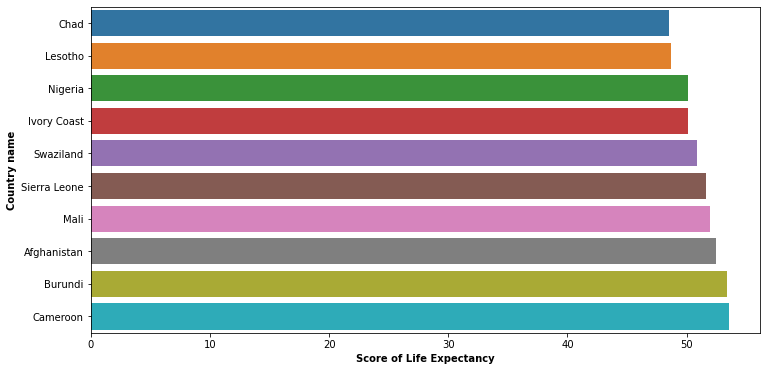

In [ ]:
popularity=world_sorted_ranking.sort_values('Healthy life expectancy',ascending='False')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['Healthy life expectancy'].head(10),y=popularity['Country name'].head(10), data=popularity)

plt.xlabel('Score of Life Expectancy', weight='bold')
plt.ylabel('Country name', weight='bold')
plt.savefig('best_countries_to_live.png')

In [ ]:
scaling=MinMaxScaler()
world_scaled_df=scaling.fit_transform(world_cleaned_df[['weighted_average','Healthy life expectancy']])
world_normalized_df=pd.DataFrame(world_scaled_df,columns=['weighted_average','Healthy life expectancy'])
world_normalized_df.head()

,weighted_average,Healthy life expectancy
0,0.734983,0.826058
1,0.757694,0.850641
2,0.803014,0.910342
3,0.891276,0.861176
4,0.808076,0.840105


In [ ]:
world_cleaned_df[['normalized_weighted_average','normalized_Health_parameter']]=movie_normalized_df

In [ ]:
world_cleaned_df['score']=world_cleaned_df['normalized_weighted_average'] * 0.5 + movies_cleaned_df['normalized_Health_parameter'] *0.5
world_scored_df=world_cleaned_df.sort_values(['score'],ascending=False)
world_scored_df[['Country name','normalized_weighted_average','normalized_Health_parameter', 'score']].head(20)

,Country name,normalized_weighted_average,normalized_Health_parameter,score
3,Iceland,1.000000,0.861176,0.930588
31,Singapore,0.858957,1.000000,0.929478
2,Switzerland,0.914156,0.910342,0.912249
26,Spain,0.892897,0.920878,0.906887
5,Norway,0.938091,0.871712,0.904901
20,France,0.913439,0.896295,0.904867
10,Australia,0.908923,0.892783,0.900853
8,New Zealand,0.925323,0.875224,0.900273
1,Denmark,0.936894,0.850641,0.893767
11,Israel,0.906055,0.878841,0.892448


In [ ]:
## Q2

In [ ]:
dataed = pd.read_csv("world_happiness.csv")

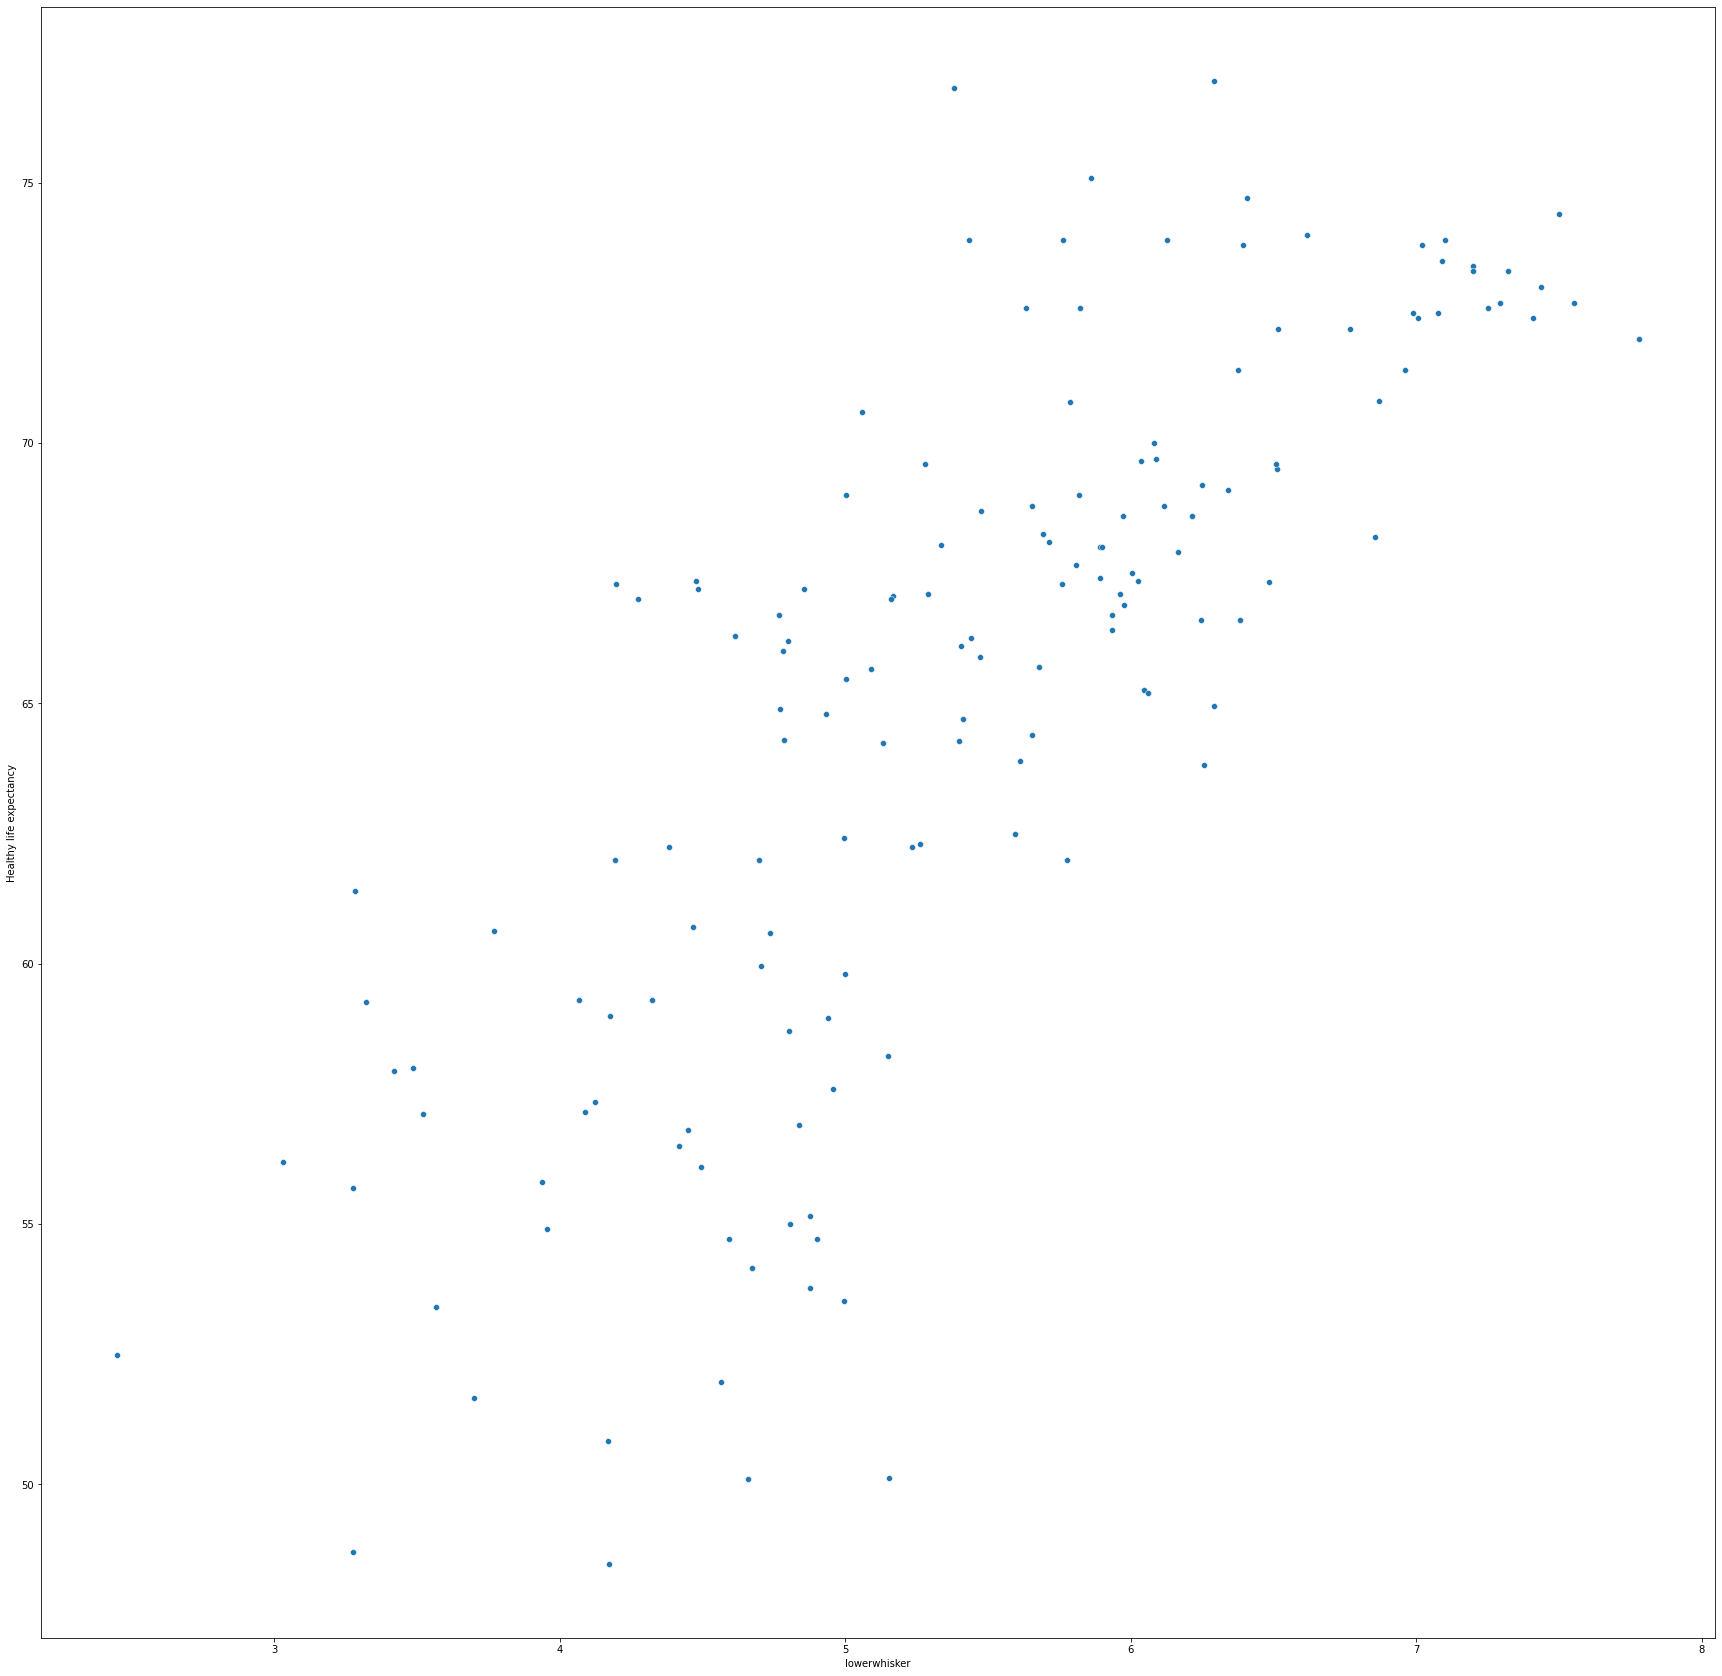

In [ ]:
plt.figure(figsize=(30,30))
sns.scatterplot(data= dataed, x='lowerwhisker',y='Healthy life expectancy')
plt.show()

<AxesSubplot:xlabel='Regional indicator', ylabel='Healthy life expectancy'>

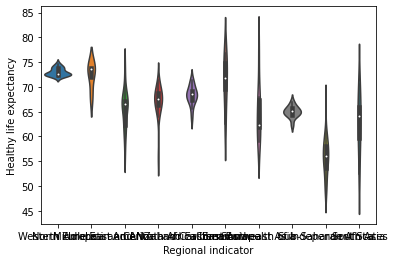

In [ ]:
sns.violinplot(x="Regional indicator", y="Healthy life expectancy", data=dataed)